In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer_Churn.csv')

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# To Convert numeric to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [6]:
# To Convert object to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors= 'coerce') # errors= 'coerce' will change blank string as NaN

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Univariate analysis

### Categorical Variables

1. Frequenct table
2. Bar plot
3. Summary Statistics

### Numerical Variables

1. Histogram
2. Density
3. Violin
4. Box Plot

In [8]:
df_mpg = pd.read_csv('mpg.csv')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df_mpg.shape

(398, 9)

In [10]:
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [11]:
df_mpg['horsepower'] = df_mpg['horsepower'].replace('?',0)

In [12]:
df_mpg['horsepower'] = pd.to_numeric(df_mpg['horsepower'])

In [13]:
df_mpg['horsepower'] = df_mpg['horsepower'].replace(0,df_mpg['horsepower'].mean())

In [14]:
df_mpg['horsepower'].dtype

dtype('float64')

In [15]:
# Histogram

In [16]:
K = 1 + 3.322*(np.log(398))
K

20.886993561554902

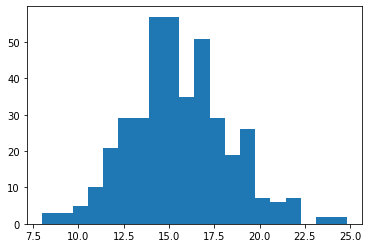

In [17]:
plt.hist(df_mpg['acceleration'],bins = 20) # bins = 20 created 20 class intervals.
plt.show()  #Will supress the value arrays.

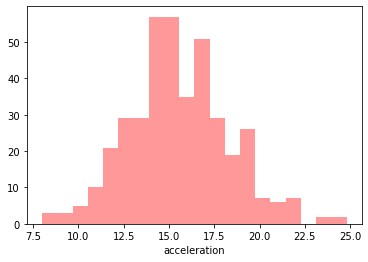

In [18]:
sns.distplot(df_mpg['acceleration'],bins = 20,hist=True,kde=False,color = 'r')
plt.show()

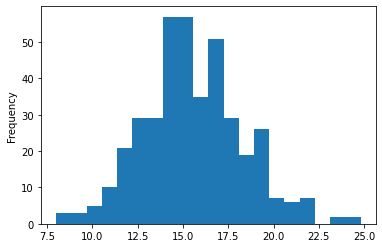

In [19]:
df_mpg['acceleration'].plot(kind = 'hist',bins =20)
plt.show()

In [20]:
# Also plot the measure of central tedency.

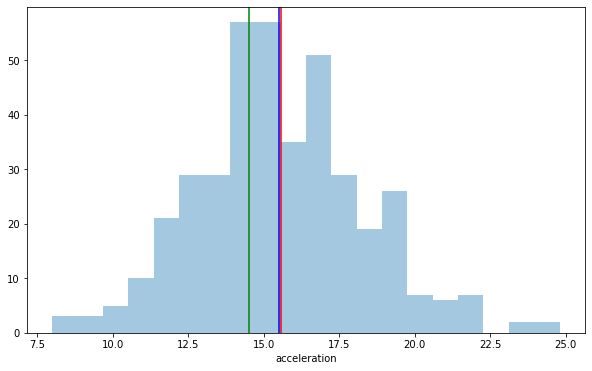

In [21]:
plt.figure(figsize = (10,6))

sns.distplot(a = df_mpg['acceleration'],kde = False, bins = 20)

# Measure of central tendency.
plt.axvline(x = df_mpg['acceleration'].mean(),color = 'red' )
plt.axvline(x = df_mpg['acceleration'].median(),color = 'blue' )
plt.axvline(x = df_mpg['acceleration'].mode()[0],color = 'green')

plt.show()

In [22]:
# Plot Histograms for all numeric values.

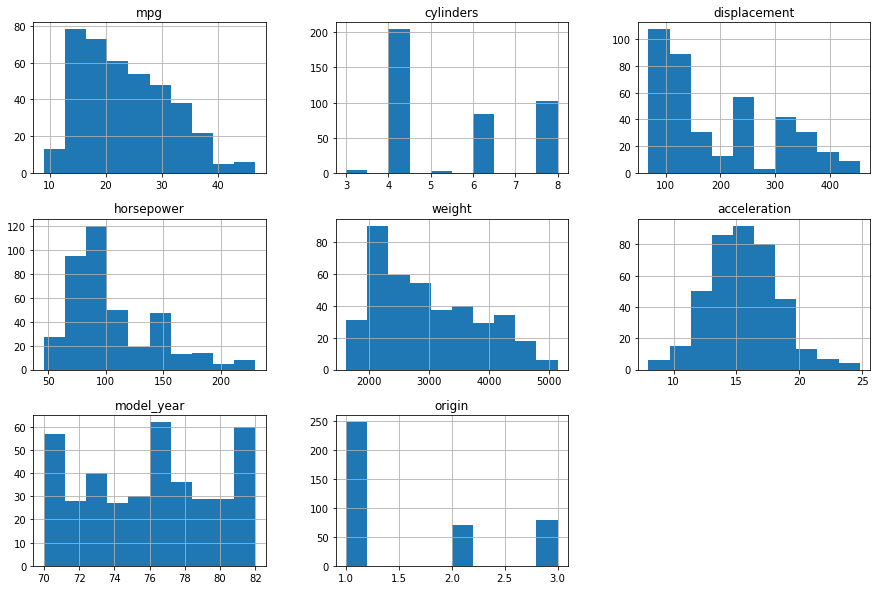

In [23]:
df_numeric = df_mpg.select_dtypes(include='number')

df_numeric.hist(figsize=(15,10))

plt.show()

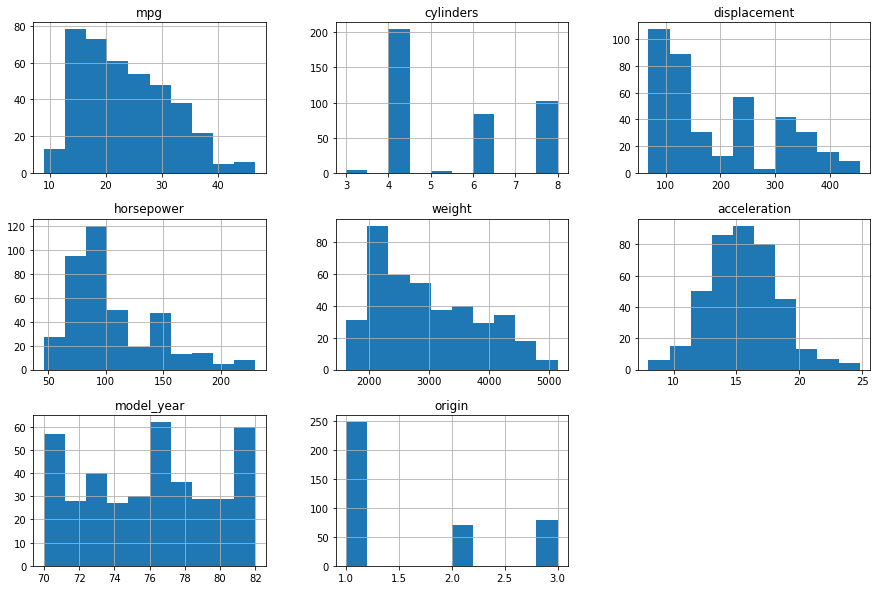

In [24]:
df_mpg.hist(figsize=(15,10))
plt.show()

In [25]:
# # DistPlot - Kernel Density Estimation(KDE)

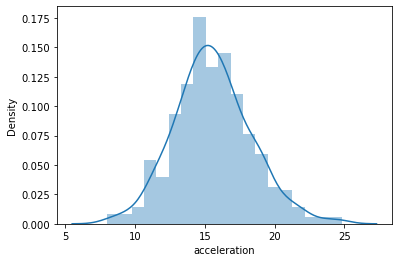

In [26]:
sns.distplot(df_mpg['acceleration'], hist = True, kde =True)
plt.show()

In [27]:
# For all numeric values

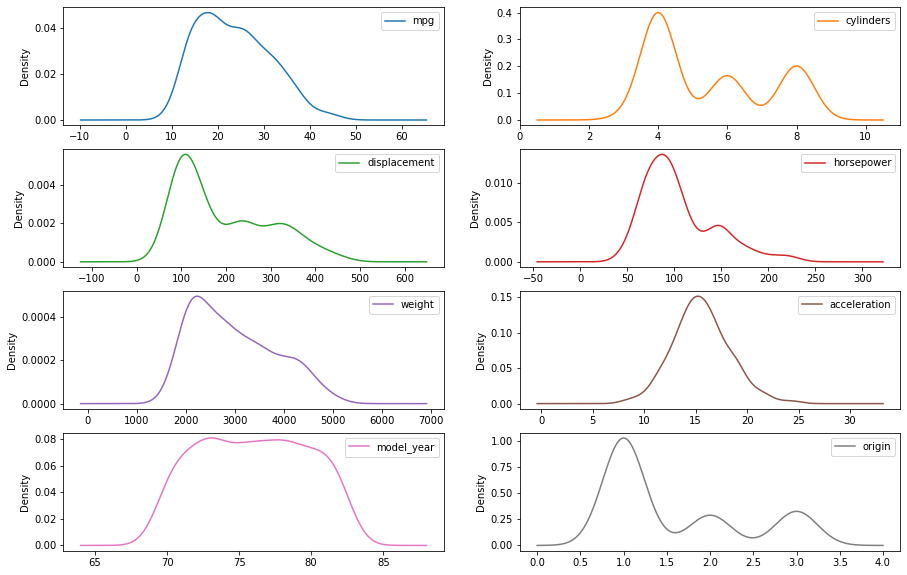

In [28]:
df_numeric = df_mpg.select_dtypes(include='number')

df_numeric.plot(kind = 'kde', subplots = True, layout = (4,2), sharex = False, figsize = (15,10))
plt.show()

In [29]:
# Box Plot

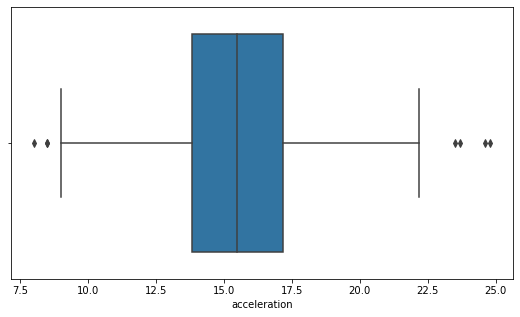

In [30]:
plt.figure(figsize = (9,5))
sns.boxplot(df_mpg['acceleration'])
plt.show()

In [31]:
# Create box plot for all numeric variables.

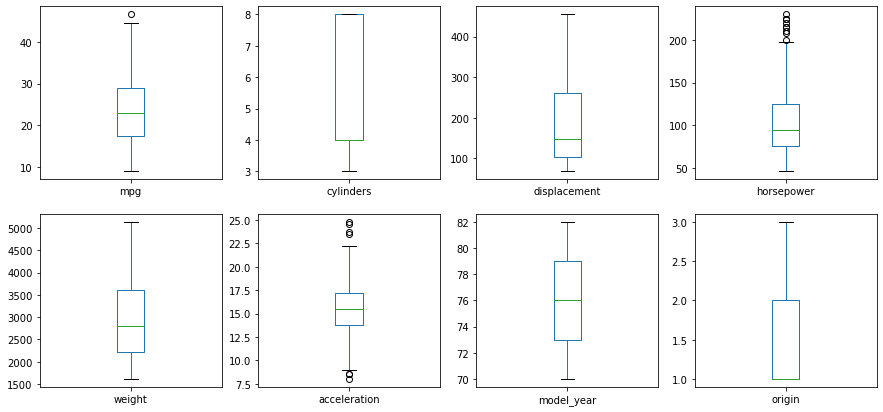

In [32]:
df_numeric = df_mpg.select_dtypes(include='number')

df_numeric.plot(kind = 'box',subplots = True, layout = (2,4),sharex = False,figsize = (15,7))
plt.show()

In [33]:
# Violin Plot

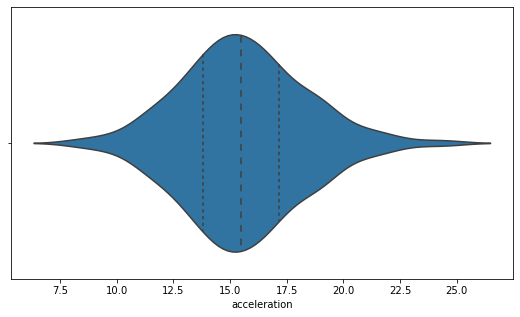

In [34]:
plt.figure(figsize = (9,5))
sns.violinplot(df_mpg['acceleration'], inner = "quartile") # inner = quartile plots the quartiles for the distribution
plt.show()

In [35]:
# Cumulative Distribution

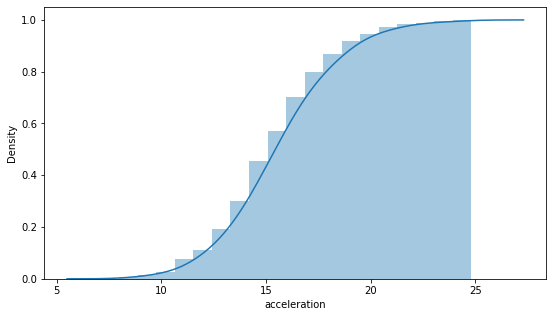

In [36]:
plt.figure(figsize = (9,5))

sns.distplot(df_mpg['acceleration'],hist_kws=dict(cumulative = True),kde_kws=dict(cumulative = True) )
plt.show()

In [37]:
# Cumulative distribution plot for all numeric variables

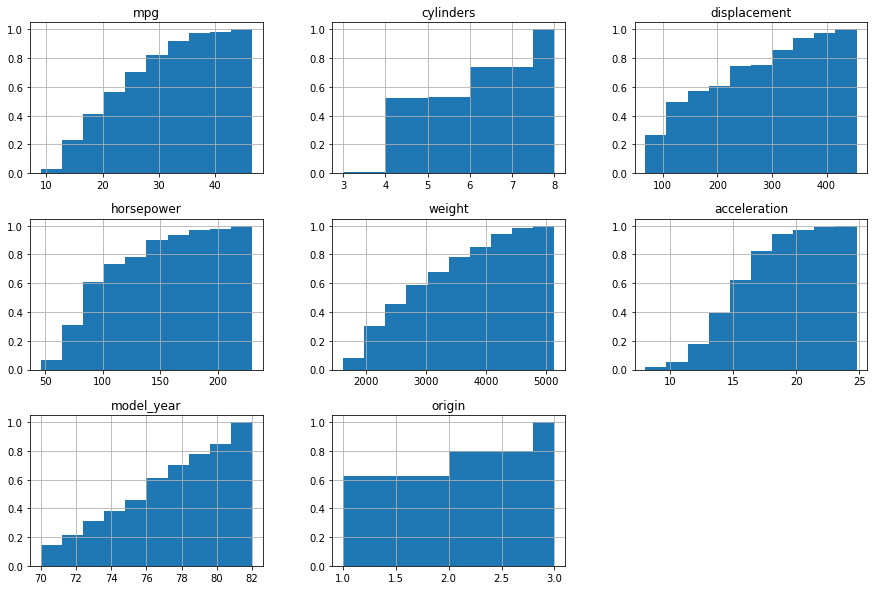

In [38]:
df_numeric = df_mpg.select_dtypes(include='number')
df_numeric.hist(figsize= (15,10), density = True, cumulative =True)
plt.show()

In [39]:
# barplot

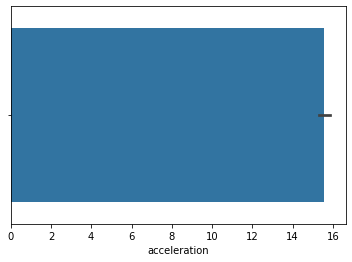

In [40]:
sns.barplot(df_mpg['acceleration'])
plt.show()

In [41]:
df_mpg['acceleration'].mean()

15.568090452261291

In [42]:
# Correlation and Pair plot

In [43]:
df_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000


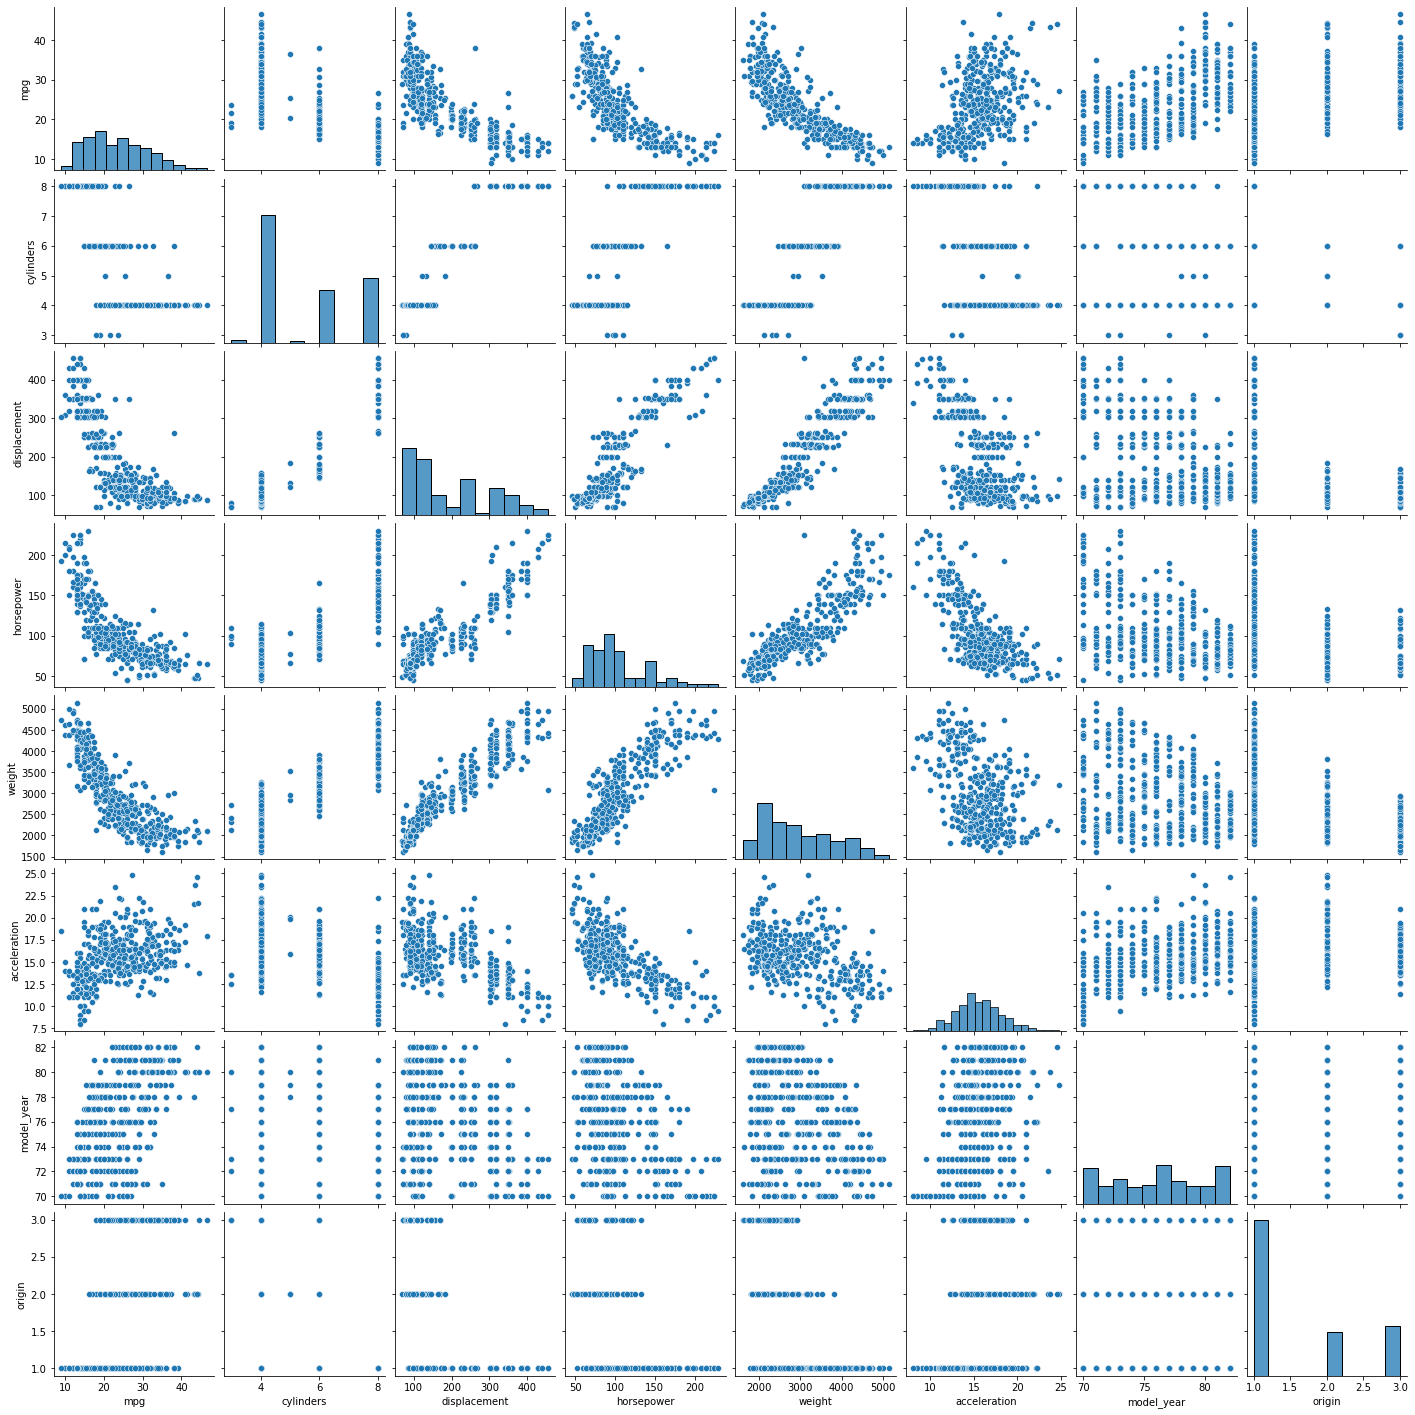

In [44]:
sns.pairplot(df_mpg)
plt.show()

# Bivariate Analysis

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1 -- Quantitative and Quantitative

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
# Line plot

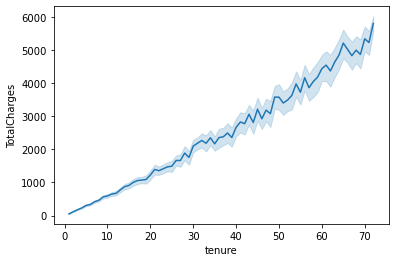

In [48]:
sns.lineplot(df['tenure'],df['TotalCharges'])
plt.show()

In [49]:
# Scatter plot

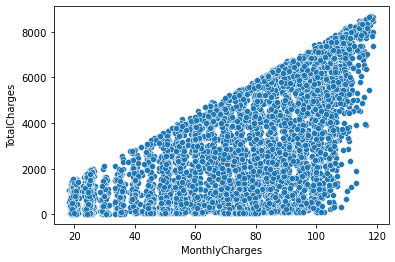

In [50]:
sns.scatterplot(x='MonthlyCharges',y ='TotalCharges',data = df )
plt.show()

In [51]:
# HeatMap - correlation between 2 variables.

In [52]:
df_num = df.select_dtypes(include = 'number')

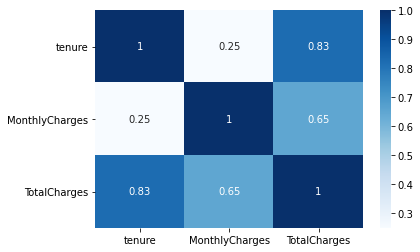

In [53]:
sns.heatmap(data = df_num.corr(),annot = True,cmap = 'Blues')
plt.show()

In [54]:
# Regression Plot

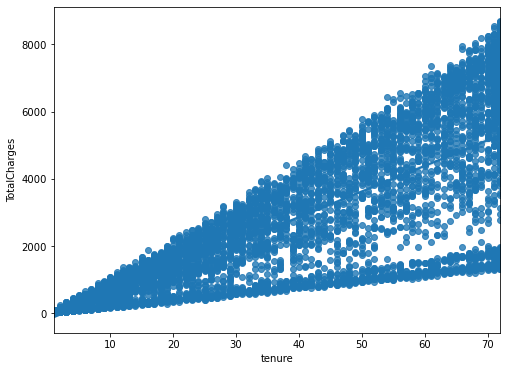

In [55]:
plt.figure(figsize = (8,6))
sns.regplot(x='tenure', y= 'TotalCharges',data = df)
plt.show()

# Quantitative and Categorical

In [56]:
# bar plot

In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

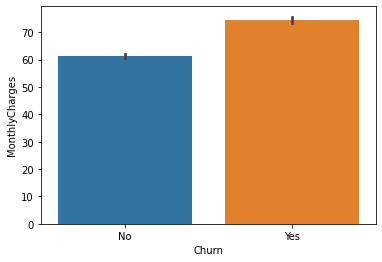

In [58]:
sns.barplot(x='Churn' ,y= 'MonthlyCharges',data = df)
plt.show()

In [59]:
# Kernel Density Plot

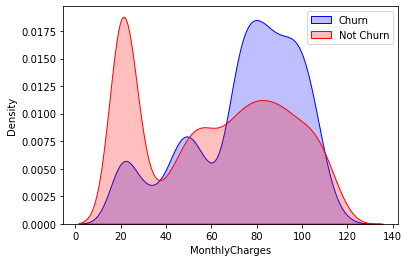

In [60]:
sns.kdeplot(data = df['MonthlyCharges'][df['Churn'] == 'Yes'],color = 'blue',shade = True)
sns.kdeplot(data = df['MonthlyCharges'][df['Churn'] == 'No'],color = 'red',shade = True)
plt.legend(['Churn','Not Churn'],loc = 'upper right')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.show()

In [61]:
# Box Plot

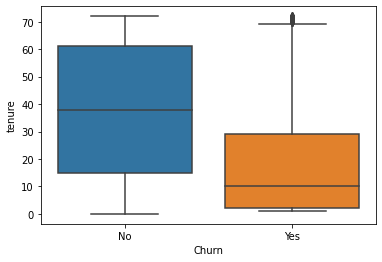

In [62]:
sns.boxplot(x= 'Churn',y = 'tenure',data = df)
plt.show()

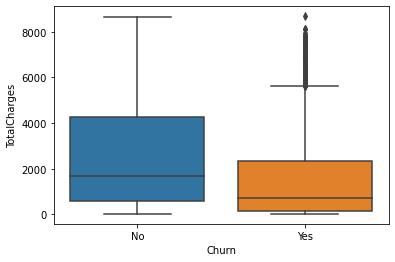

In [63]:
sns.boxplot(x= 'Churn',y = 'TotalCharges',data = df)
plt.show()

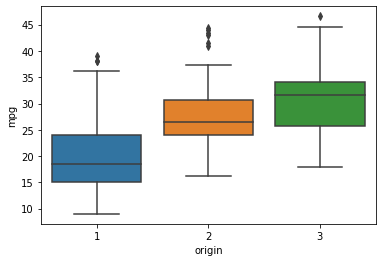

In [64]:
sns.boxplot(x= 'origin',y = 'mpg',data = df_mpg)
plt.show()

In [65]:
# Violin Plot

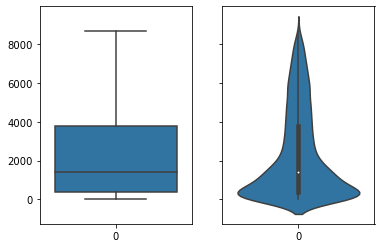

In [66]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, sharey =True,figsize = (6,4))
sns.boxplot(data = df['TotalCharges'],ax=axes[0])
sns.violinplot(data = df['TotalCharges'],ax=axes[1])
plt.show()

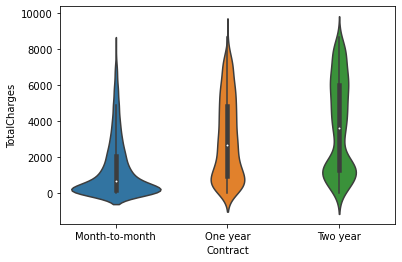

In [67]:
sns.violinplot(x='Contract', y= 'TotalCharges', data = df)
plt.show()

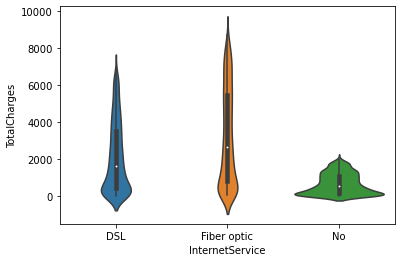

In [68]:
sns.violinplot(x= 'InternetService',y ='TotalCharges',data =df)
plt.show()

In [69]:
# Strip Plot

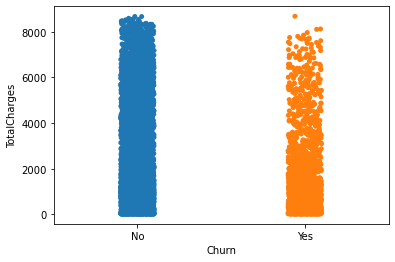

In [70]:
sns.stripplot(x='Churn',y = 'TotalCharges',data = df)
plt.show()

In [71]:
# Swarm Plot

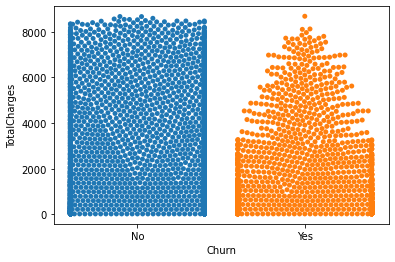

In [72]:
sns.swarmplot(x ='Churn',y ='TotalCharges', data = df )
plt.show()

# Categorical and Categorical

In [73]:
# Cross Tab

In [74]:
pd.crosstab(index = df['Churn'],columns= df['InternetService'])

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


In [75]:
# Stacked Bar chart

In [76]:
stack = pd.pivot_table(data = df, index = ['Contract'], columns =['Churn'], values = ['customerID'],aggfunc = 'count')
print(stack)

               customerID      
Churn                  No   Yes
Contract                       
Month-to-month       2220  1655
One year             1307   166
Two year             1647    48


In [77]:
# Using pivot table to create stacked bar chart.

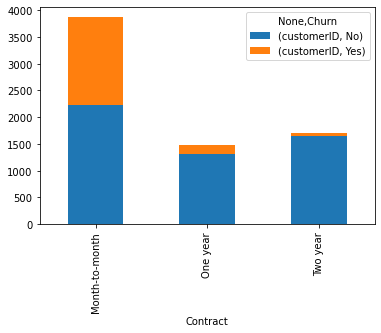

In [78]:
stack.plot(kind = 'bar',stacked = True)
plt.show()

In [79]:
stack1 = pd.pivot_table(data = df, index = ['PaperlessBilling'], columns =['Churn'], values = ['customerID'],aggfunc = 'count')
print(stack1)

                 customerID      
Churn                    No   Yes
PaperlessBilling                 
No                     2403   469
Yes                    2771  1400


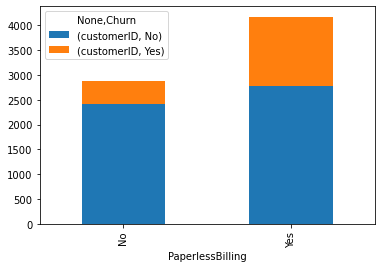

In [80]:
stack1.plot(kind = 'bar',stacked = True)
plt.show()

In [81]:
stack2 = pd.pivot_table(data = df, index = ['PaymentMethod'], columns =['Churn'], values = ['customerID'],aggfunc = 'count')
print(stack2)

                          customerID      
Churn                             No   Yes
PaymentMethod                             
Bank transfer (automatic)       1286   258
Credit card (automatic)         1290   232
Electronic check                1294  1071
Mailed check                    1304   308


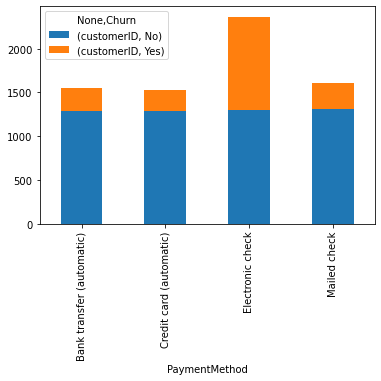

In [82]:
stack2.plot(kind = 'bar',stacked = True)
plt.show()

In [83]:
# Count Plot

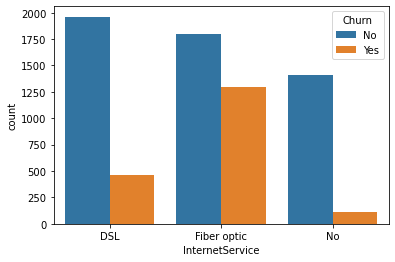

In [84]:
sns.countplot(x = 'InternetService',hue='Churn',data =df)
plt.show()

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
# Function for printing COUNT PLOTS

In [87]:
df_cat = df.select_dtypes('object')

In [88]:
cat_cols = list(df_cat.columns)

In [89]:
def cat_plot(col):
    data = df_cat[col]
    plt.figure(figsize = (10,8))
    sns.countplot(data = df_cat, x = data)
    plt.title(col)
    plt.show()

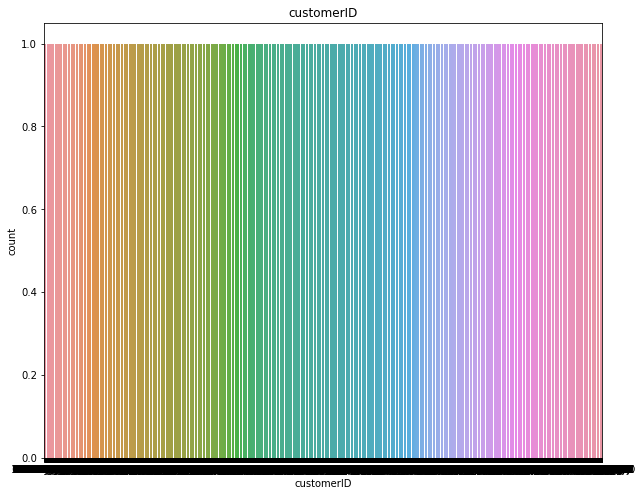

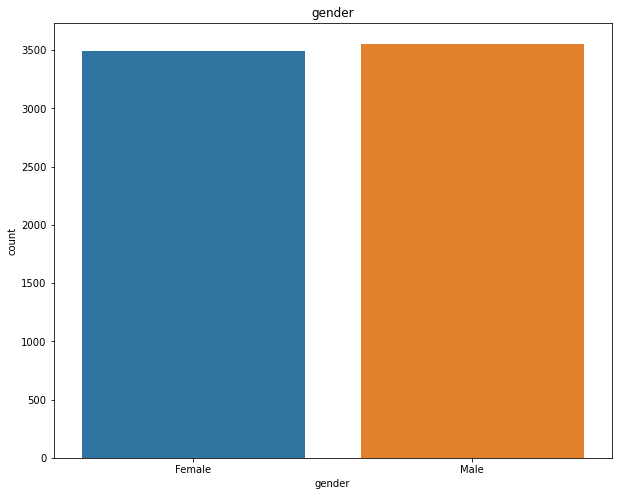

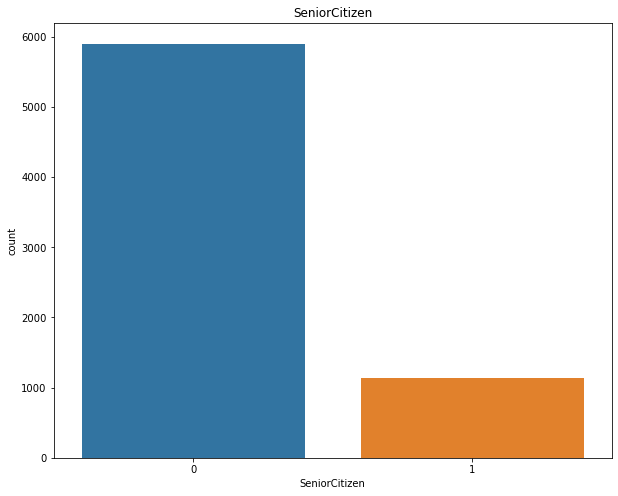

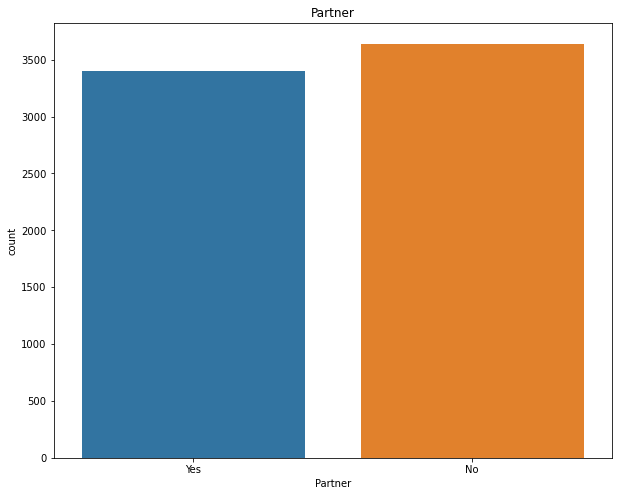

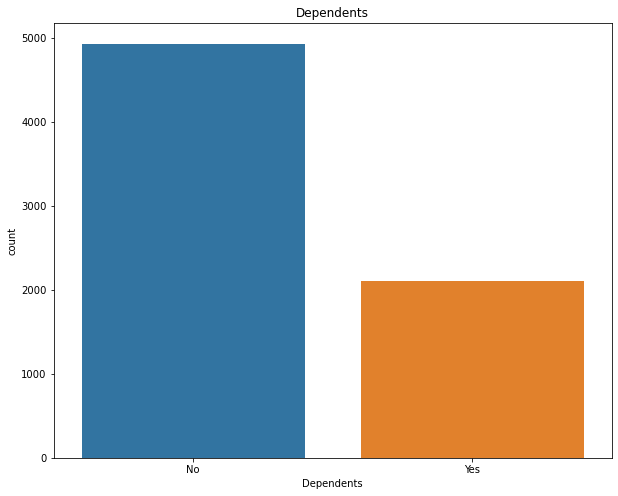

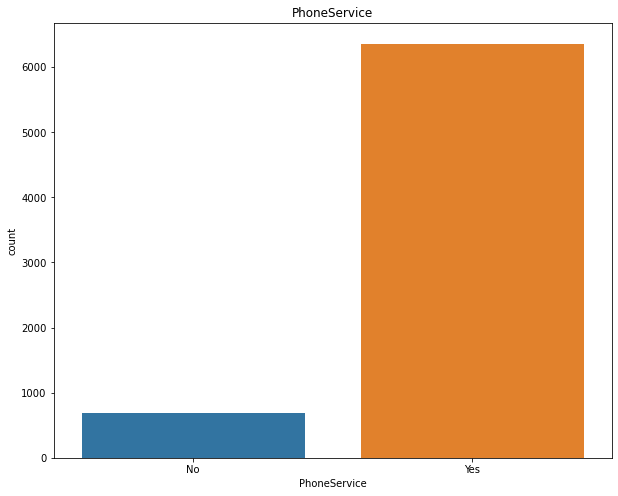

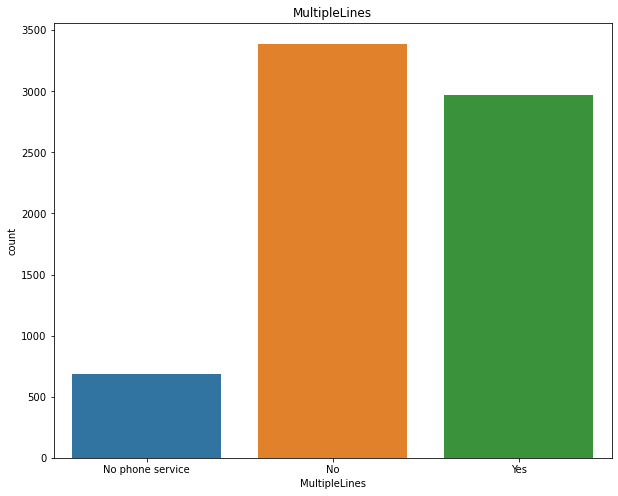

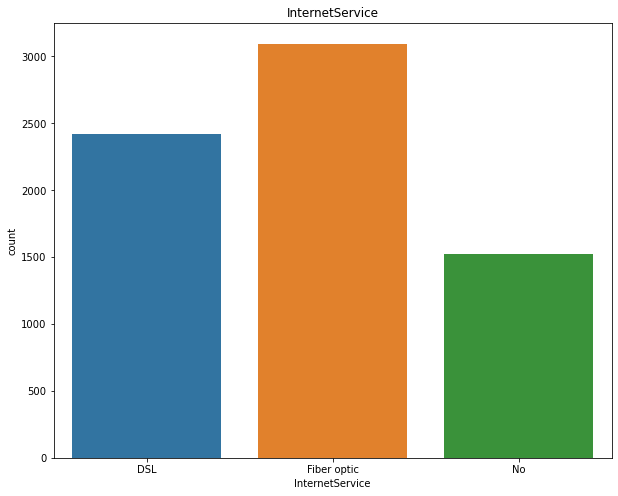

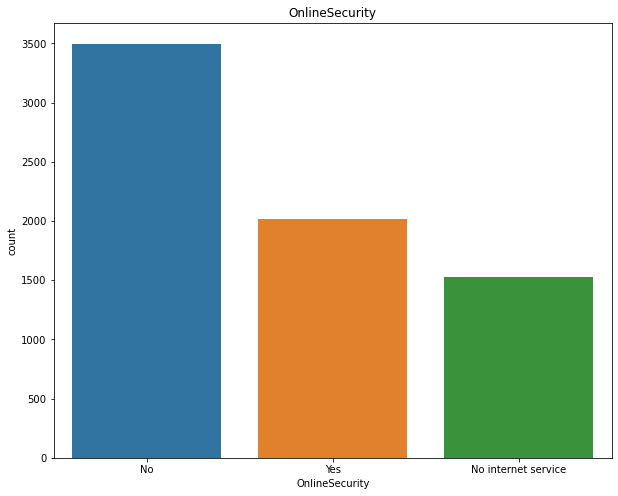

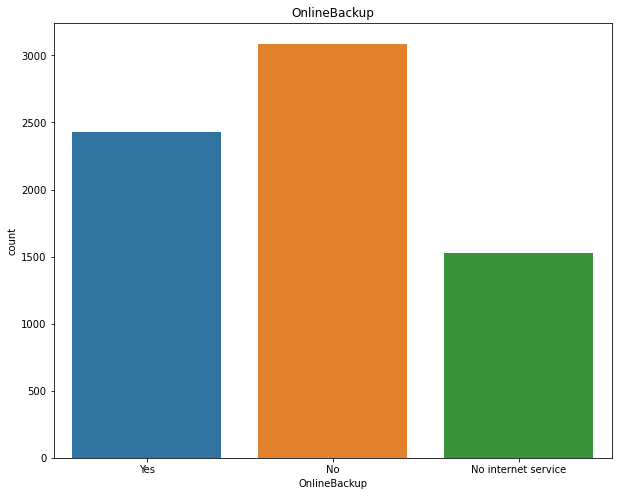

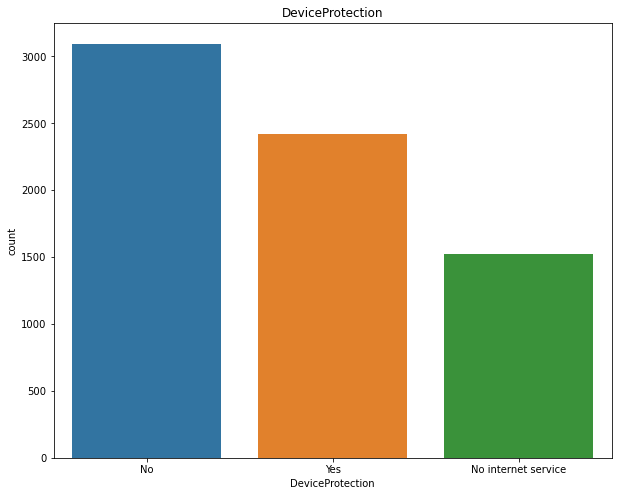

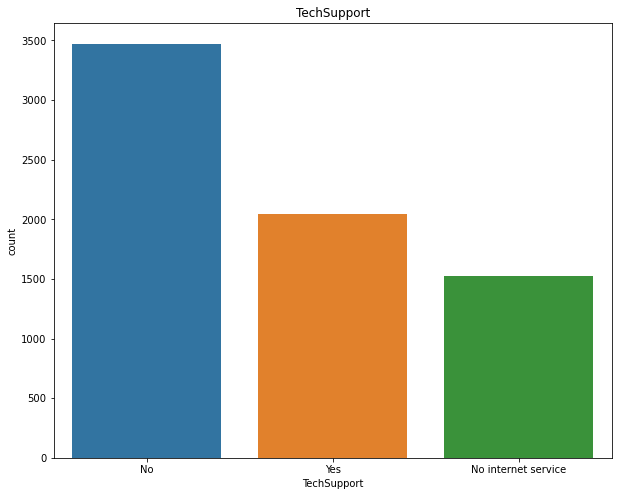

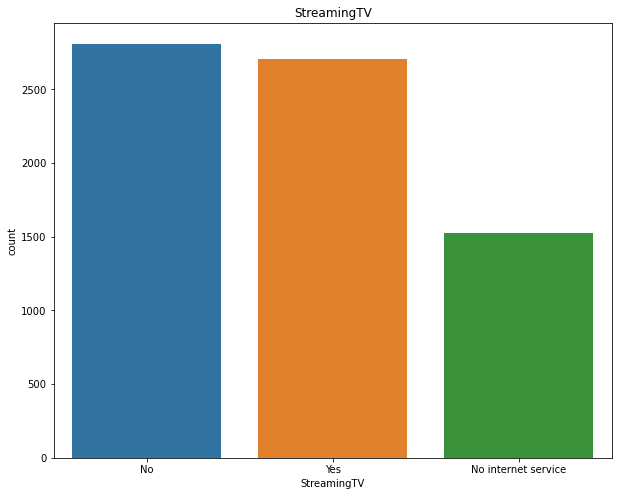

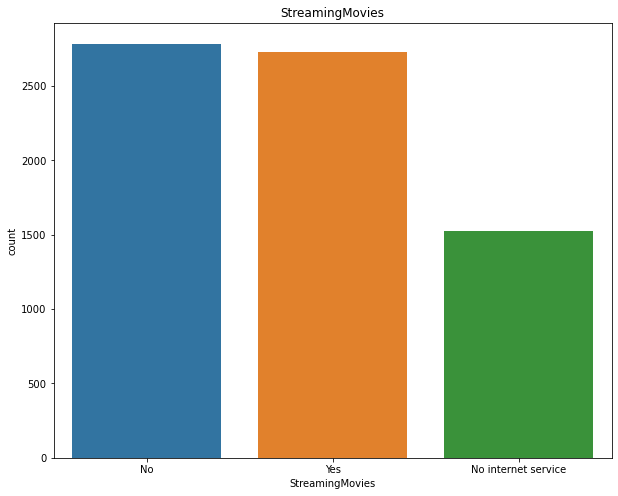

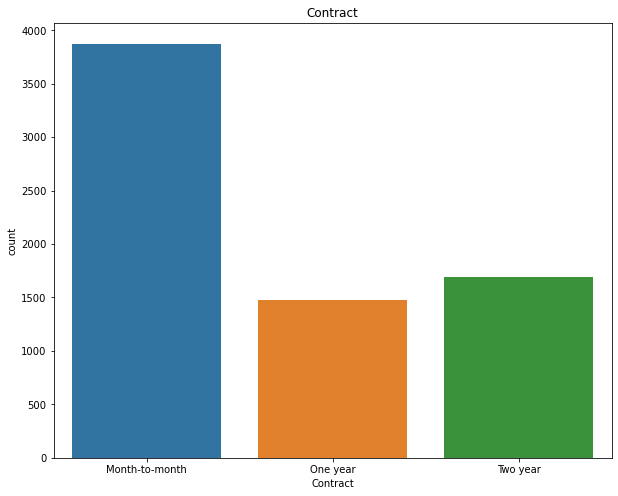

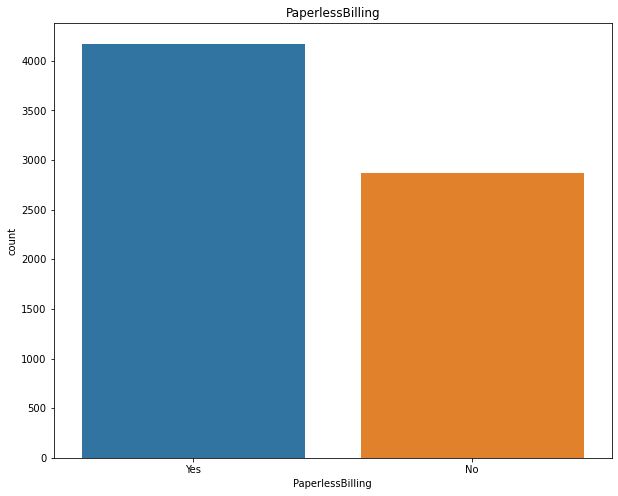

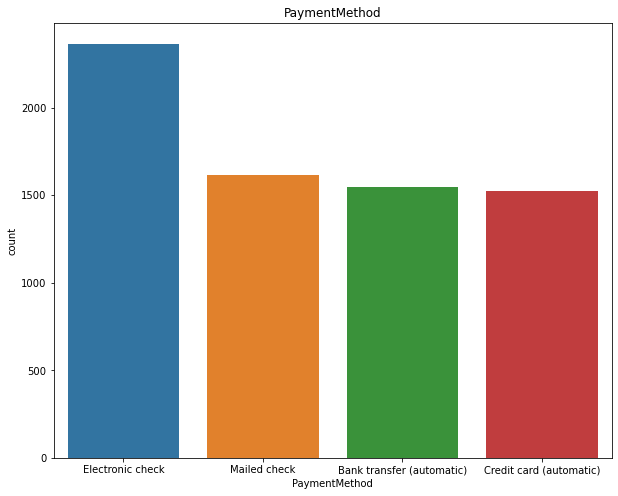

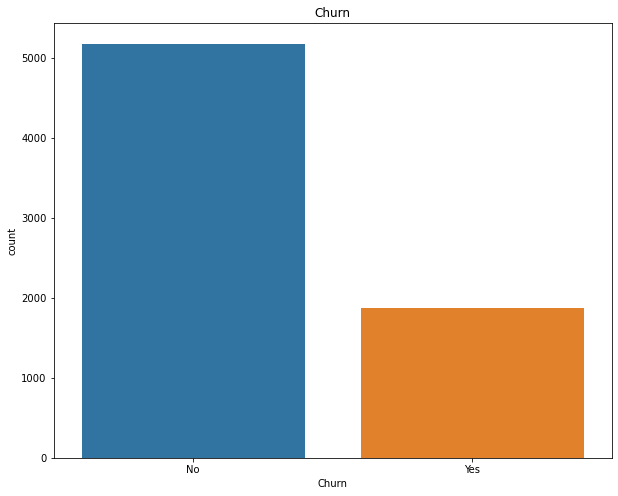

In [90]:
for i in cat_cols:
    cat_plot(i)

In [91]:
# Function for printing SCATTER PLOTS

In [92]:
df_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [93]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [94]:
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [95]:
df_num =  df_mpg.select_dtypes('number')
df_num.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [96]:
num_cols = list(df_num.columns)

In [97]:
# fig,ax = plt.subplots(nrows = 3, ncols=3, figsize =[12,18])

def scatter_plot(col):
    y = df_mpg['mpg']
    x = df_num[col]
    sns.scatterplot(x = x, y = y,data = df_num)
    plt.title(col)
    plt.show()
    

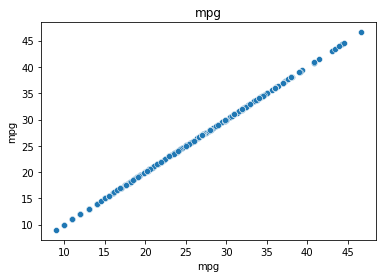

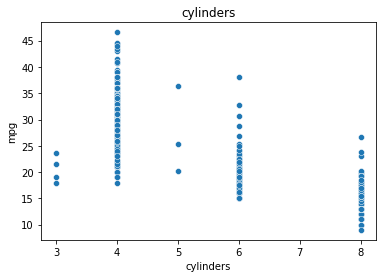

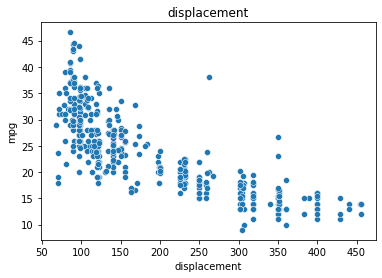

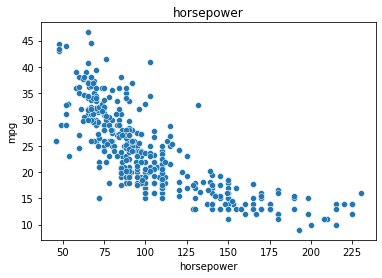

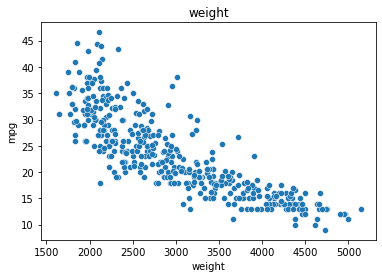

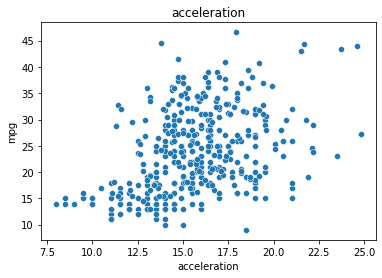

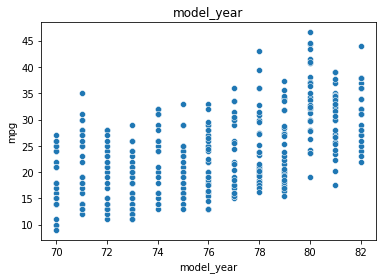

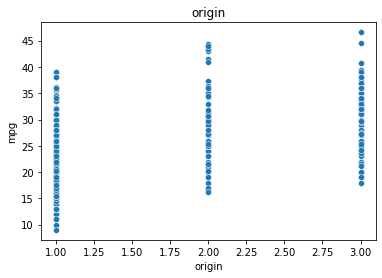

In [98]:
for i in num_cols:
    scatter_plot(i)

In [99]:
df_num2 =df_num.drop(['mpg'],axis =1)

In [100]:
a = df_num['mpg']

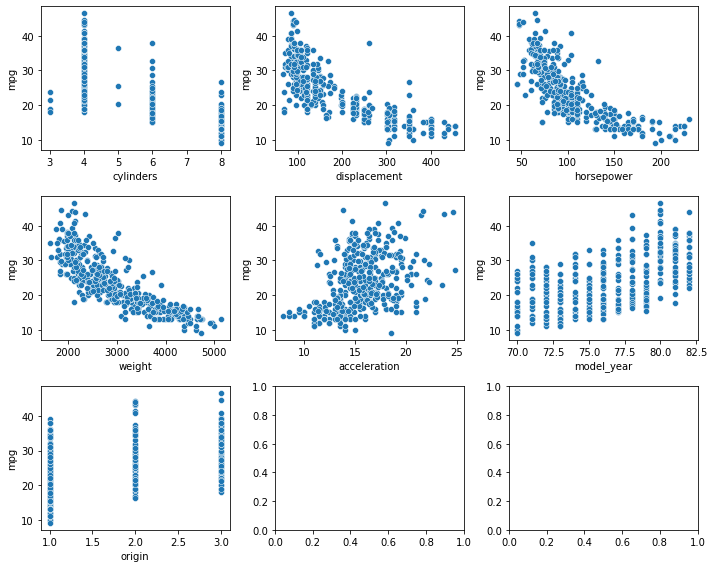

In [101]:
fig,ax = plt.subplots(nrows = 3, ncols = 3,figsize =(10,8))


for i,subplot in zip(df_num2.columns[0:],ax.flatten()):
    sns.scatterplot(df_num2[i], a,ax =subplot)
    
plt.tight_layout()
plt.show()

In [102]:
df_num.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

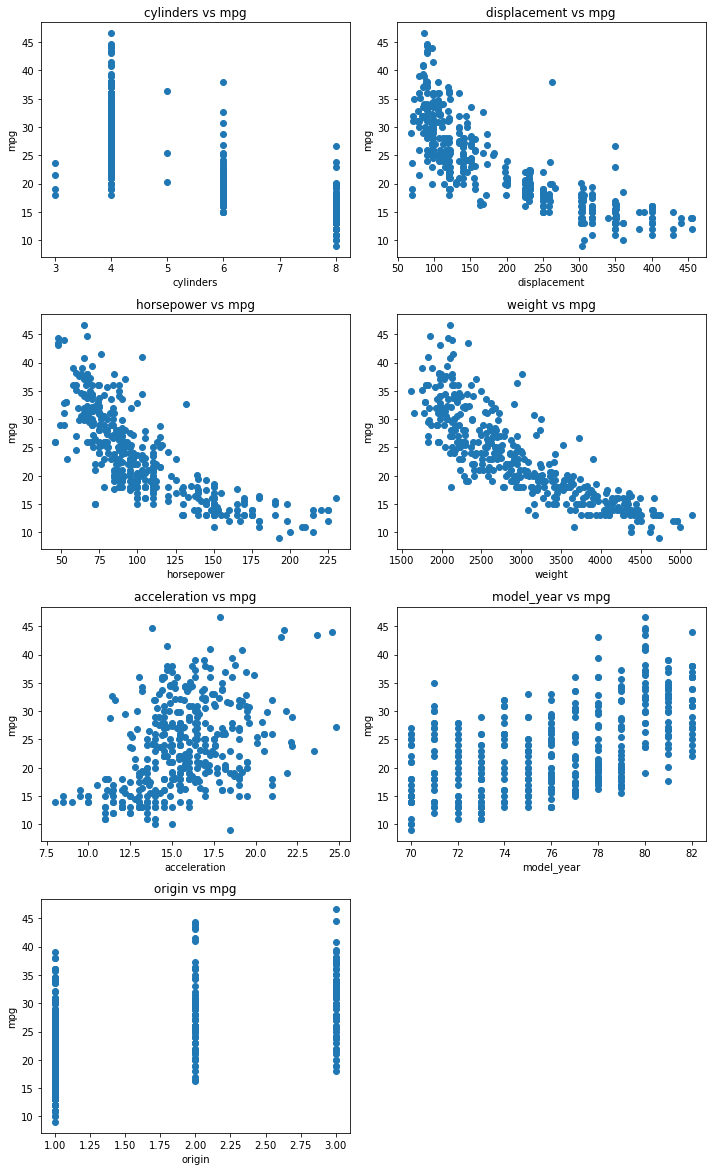

In [103]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_num[x],df_num['mpg'])
    plt.title(x+' vs mpg')
    plt.ylabel('mpg')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('cylinders', 1)
scatter('displacement', 2)
scatter('horsepower', 3)
scatter('weight', 4)
scatter('acceleration', 5)
scatter('model_year', 6)
scatter('origin', 7)

plt.tight_layout()